# Loading the dataset


In [ ]:
train_path = '/content/drive/MyDrive/Yoga_dataset/TRAIN'
test_path = '/content/drive/MyDrive/Yoga_dataset/TEST'

# Importing important libraries

In [ ]:
import os
import sys
import datetime
import glob as glob
import numpy as np
import cv2
import keras
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.optimizers import SGD
import tensorflow
from scipy.interpolate import make_interp_spline
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
print(keras.__version__)
print(tensorflow.__version__)

2.5.0
2.5.0


#Data Preprocessing

In [ ]:
datagen = ImageDataGenerator(
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest')

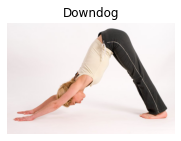

In [ ]:
img = load_img('/content/drive/MyDrive/Yoga_dataset/TRAIN/downdog/00000128.jpg')
plt.figure(figsize = (3,3))
plt.imshow(img)
plt.axis('off')
plt.title('Downdog')
plt.show()

In [ ]:
x = img_to_array(img)
x2 = x.reshape((1,) + x.shape)

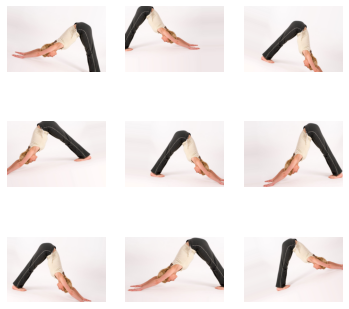

In [ ]:
i = 0
fig = plt.figure(figsize = (6,6))
plt.title('Pre-processed')
for batch in datagen.flow(x2, batch_size = 1):
    i += 1
    if i > 9:
        break
    temp = batch.reshape(x.shape)
    plt.subplot(3, 3, i)
    plt.imshow(temp.astype('uint8'))
    plt.axis('off')
plt.show()

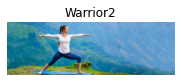

In [ ]:

img = load_img('/content/drive/MyDrive/Yoga_dataset/TRAIN/warrior2/00000118.jpg')
plt.figure(figsize = (3,3))
plt.imshow(img)
plt.axis('off')
plt.title('Warrior2')
plt.show()

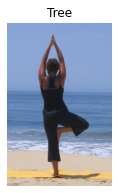

In [ ]:
img = load_img('/content/drive/MyDrive/Yoga_dataset/TRAIN/tree/00000070.jpg')
plt.figure(figsize = (3,3))
plt.imshow(img)
plt.axis('off')
plt.title('Tree')
plt.show()

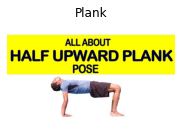

In [ ]:
img = load_img('/content/drive/MyDrive/Yoga_dataset/TRAIN/plank/00000128.jpg')
plt.figure(figsize = (3,3))
plt.imshow(img)
plt.axis('off')
plt.title('Plank')
plt.show()

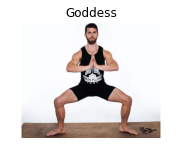

In [ ]:
img = load_img('/content/drive/MyDrive/Yoga_dataset/TRAIN/goddess/00000096.jpg')
plt.figure(figsize = (3,3))
plt.imshow(img)
plt.axis('off')
plt.title('Goddess')
plt.show()

#Default Settings

In [ ]:

img_width, img_height = 224, 224

train_dir = train_path
test_dir = test_path
nb_epochs = 20
batch_size = 32
nb_classes = len(glob.glob(train_dir + '/*'))

In [ ]:
# get number of images in training directory
nb_train_samples = 0
for r, dirs, files in os.walk(train_dir):
    for dr in dirs:
        nb_train_samples += len(glob.glob(os.path.join(r, dr + "/*")))
print(nb_train_samples)

1080


In [ ]:
# get number of images in test directory
nb_test_samples = 0
for r, dirs, files in os.walk(test_dir):
    for dr in dirs:
        nb_test_samples += len(glob.glob(os.path.join(r, dr + "/*")))
print(nb_test_samples)

468


# Data pre-processing for training

In [ ]:
train_datagen =  ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    fill_mode = 'nearest',
    horizontal_flip = True)

#Data preprocessing for test

In [ ]:
test_datagen =  ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    fill_mode = 'nearest',
    horizontal_flip = True)

In [ ]:
# generate and store training data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (img_width, img_height),
    batch_size = batch_size)

Found 1080 images belonging to 5 classes.


In [ ]:
# generate and store validation data
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (img_width, img_height),
    batch_size = batch_size)

Found 468 images belonging to 5 classes.


##Set up transfer learning on pre-trained ImageNet VGG16 model - remove fully connected layer and replace with softmax for classifying 5 classes

In [ ]:
vgg16_model = VGG16(weights = 'imagenet', include_top = False)
x = vgg16_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(nb_classes, activation = 'softmax')(x)
model = Model(vgg16_model.input,predictions)

58900480/58889256 [==============================] - 1s 0us/step


In [ ]:
# freeze all layers of the pre-trained model
for layer in vgg16_model.layers:
    layer.trainable = False

In [ ]:
# compile the new model using a RMSProp optimizer
model.compile(optimizer = 'rmsprop',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy'])

In [ ]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [ ]:
# fit the model, log the results and the training time
now = datetime.datetime.now
t = now()
transfer_learning_history = model.fit_generator(train_generator,
                                                steps_per_epoch=5,
                                                epochs=10,
                                                validation_data=test_generator,
                                                validation_steps=5
                                                
                                                )
print('Training time: %s' % (now() - t))

NameError: ignored

In [ ]:
# evaluate the performance the new model and report the results
model.evaluate_generator(train_generator)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1948: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


[0.9759079813957214, 0.6685185432434082]

In [ ]:
model.evaluate_generator(test_generator)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1948: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 11 bytes but only got 10. Skipping tag 42037
  " Skipping tag %s" % (size, len(data), tag)


[0.8482025265693665, 0.7158119678497314]

In [ ]:
# save transfer learning model for offline prediction purposes
model.save('yoga_vgg16_model_tl.h5')

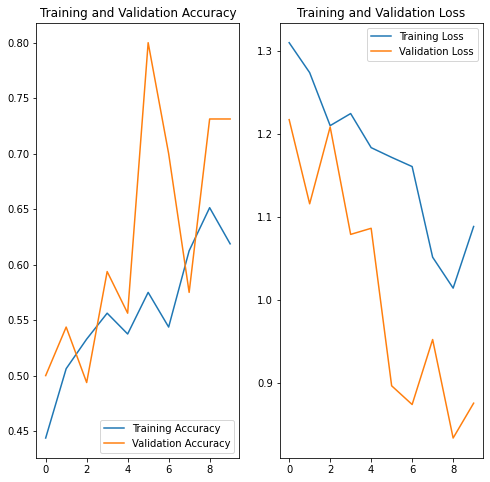

In [ ]:
acc = transfer_learning_history.history['accuracy']
val_acc = transfer_learning_history.history['val_accuracy']

loss = transfer_learning_history.history['loss']
val_loss = transfer_learning_history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:

test_generator.total_batches_seen

136

In [ ]:
num_images = len(glob.glob("/content/drive/MyDrive/Yoga/*.jpg"))

In [ ]:
predict_files = glob.glob("/content/drive/MyDrive/Yoga/*.jpg")

In [ ]:
im = cv2.imread(predict_files[0])
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
im = cv2.resize(im, (256, 256)).astype(np.float32)
im = np.expand_dims(im, axis = 0)/255

In [ ]:
predictor, image_id = [], []
for i in predict_files:
    im = cv2.imread(i)
    im = cv2.resize(cv2.cvtColor(im, cv2.COLOR_BGR2RGB), (256, 256)).astype(np.float32) / 255.0
    im = np.expand_dims(im, axis =0)
    outcome = [np.argmax(model.predict(im))]
    predictor.extend(list(outcome))
    image_id.extend([i.rsplit("\\")[-1]])

In [ ]:
final = pd.DataFrame()
final["id"] = image_id
final["Yoga"] = predictor
final.head(num_images)

,id,Yoga
0,/content/drive/MyDrive/Yoga/dd1.jpg,0
1,/content/drive/MyDrive/Yoga/dd2.jpg,0
2,/content/drive/MyDrive/Yoga/p1.jpg,2
3,/content/drive/MyDrive/Yoga/p2.jpg,2
4,/content/drive/MyDrive/Yoga/t1.jpg,3
5,/content/drive/MyDrive/Yoga/t2.jpg,3
6,/content/drive/MyDrive/Yoga/w1.jpg,4
7,/content/drive/MyDrive/Yoga/w2.jpg,4
8,/content/drive/MyDrive/Yoga/g1.jpg,1
9,/content/drive/MyDrive/Yoga/g2.jpg,3


In [ ]:
classes = train_generator.class_indices
classes = {value : key for key, value in classes.items()}

In [ ]:
final["Yoga"] = final["Yoga"].apply(lambda x: classes[x])
final.head(num_images)

,id,Yoga
0,/content/drive/MyDrive/Yoga/dd1.jpg,downdog
1,/content/drive/MyDrive/Yoga/dd2.jpg,downdog
2,/content/drive/MyDrive/Yoga/p1.jpg,plank
3,/content/drive/MyDrive/Yoga/p2.jpg,plank
4,/content/drive/MyDrive/Yoga/t1.jpg,tree
5,/content/drive/MyDrive/Yoga/t2.jpg,tree
6,/content/drive/MyDrive/Yoga/w1.jpg,warrior2
7,/content/drive/MyDrive/Yoga/w2.jpg,warrior2
8,/content/drive/MyDrive/Yoga/g1.jpg,goddess
9,/content/drive/MyDrive/Yoga/g2.jpg,tree
